Reference FaceAlignment Model
- https://paperswithcode.com/task/face-alignment
- https://github.com/zhenglinzhou/star (STAR Loss: Reducing Semantic Ambiguity in Facial Landmark Detection)
- https://github.com/huangyangyu/ADNet


| Dataset      | Best Model           | Paper | Code  | Compare |
|--------------|----------------------|-------|-------|---------|
| 300W         | STAR                 | 📄    | 🔗   |         |
| WFLW         | LDEQ                 | 📄    | 🔗   |         |
| COFW         | SH-FAN               | 📄    | 🔗   |         |
| AFLW-19      | FaRL-B (epoch 16)    | 📄    | 🔗   |         |
| AFLW2000-3D  | MNN+OR (reannotated) | 📄    | 🔗   |         |




# ***0. CONNECT GOOGLE DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***1. WFLW DATASET AND STRUCTURE DATA FOR TRAINING***
https://wywu.github.io/projects/LAB/WFLW.html
https://datasets.activeloop.ai/docs/ml/datasets/wflw-dataset/



```
# the dataset directory:
|-- ${image_dir}
   |-- WFLW
      | -- WFLW_images

|-- ${annot_dir}
   |-- WFLW
      |-- train.tsv, test.tsv
```

https://github.com/ZhenglinZhou/STAR/blob/master/conf/alignment.py

Quan sát cách data_definition trong file alignment.py
```python
# /conf/alignment.py
        # COFW
        if self.data_definition == "COFW":
            self.edge_info = (
                (True, (0, 4, 2, 5)), # RightEyebrow
                (True, (1, 6, 3, 7)), # LeftEyebrow
                ...
            )
            self.nme_left_index = 16 # pupils
            self.nme_right_index = 17 # pupils
            ...
        # 300W
        elif self.data_definition == "300W":
            self.edge_info = ...
                
        # WFLW
        elif self.data_definition == "WFLW":     
  ```

## 1.1 Create mkdir, download WFLW dataset

In [ ]:
!mkdir /content/drive/MyDrive/colab
!mkdir /content/drive/MyDrive/colab/dataset_for_STAR
!mkdir /content/drive/MyDrive/colab/dataset_for_STAR/image_dir
!mkdir /content/drive/MyDrive/colab/dataset_for_STAR/annot_dir




### 1.1.1 Load images -> to image_dir
https://wywu.github.io/projects/LAB/WFLW.html

In [ ]:
# https://wywu.github.io/projects/LAB/WFLW.html
!mkdir /content/drive/MyDrive/colab/dataset_for_STAR/WFLW



In [ ]:
# https://drive.google.com/u/0/uc?id=1hzBd48JIdWTJSsATBEB_eFVvPL1bx6UC&export=download
%cd /content/drive/MyDrive/colab/dataset_for_STAR/WFLW
import gdown
gdown.download('https://drive.google.com/u/0/uc?id=1hzBd48JIdWTJSsATBEB_eFVvPL1bx6UC', 'WFLW.zip')

In [ ]:
# !unzip /content/drive/MyDrive/colab/dataset_for_STAR/WFLW/WFLW.zip -d /content/drive/MyDrive/colab/dataset_for_STAR/WFLW # Unzip, -d: directory
## Bug: End-of-central-directory signature not found.  Either this file is not a zipfile

## Dạng `.tar.gz`: sự kết hợp của TAR (lưu trữ nhiều tệp vào một tệp lớn) và Gzip (nén tệp)
## -x: Chỉ thị giải nén tệp.
## -z: Chỉ thị rằng tệp được nén bằng Gzip.
## -v: Chế độ verbose, hiển thị chi tiết quá trình giải nén.
## -f: Chỉ định tên tệp để giải nén.
## -C: Chỉ định thư mục đích để giải nén.

!tar -xzvf /content/drive/MyDrive/colab/dataset_for_STAR/WFLW/WFLW.zip -C /content/drive/MyDrive/colab/dataset_for_STAR/WFLW

In [ ]:
# remove file zip
!rm /content/drive/MyDrive/colab/dataset_for_STAR/WFLW/WFLW.zip  # xóa file .zip

In [ ]:
# copy dataset_for_STAR/WFLW to dataset_for_STAR/image_dir  - 1 giây
import shutil
shutil.move('/content/drive/MyDrive/colab/dataset_for_STAR/WFLW', '/content/drive/MyDrive/colab/dataset_for_STAR/image_dir')

### 1.1.2 Load annot -> to annot_dir
https://wywu.github.io/projects/LAB/WFLW.html
(but annot haven't processing, format .txt).
So I can use metadata(train, test) from the corresponding repository (https://github.com/huangyangyu/ADNet).

Link metadata(train, test) Google: https://drive.google.com/drive/folders/1fRwu2x5Rhqflagq85CtVooegO16jFDLr?usp=sharing

(ko xài được down như các file dạng zip => làm thủ công down về up lên)

- Đọc file README.md trong WFLW_annotations.tar.gz. 
```README.md
# Look at Boundary: A Boundary-Aware Face Alignment Algorithm.
# Wayne Wu, Chen Qian, Shuo Yang, Quan Wang, Yici Cai, Qiang Zhou.
# In CVPR 2018.
The format of txt ground truth list (7,500 for training and 2,500 for testing).
  coordinates of 98 landmarks (196) + coordinates of upper left corner and lower right corner of detection rectangle (4) + attributes annotations (6) + image name (1)
  x0 y0 ... x97 y97 x_min_rect y_min_rect x_max_rect y_max_rect pose expression illumination make-up occlusion blur image_name

Attached the mappings between attribute names and label values.
pose:normal pose->0 large pose->1
expression: normal expression->0 exaggerate expression->1
illumination: normal illumination->0 extreme illumination->1
make-up: no make-up->0 make-up->1
occlusion: no occlusion->0 occlusion->1
blur: clear->0 blur->1

```
- Mở file train.tsv, 1 dòng sẽ có 
./rawImages\51--Dresses/51_Dresses_wearingdress_51_377.jpg	431.559411,870.597153,...,494.963222,556.534734	1.995	506.5	677.0	0,0,1,0,0,0

1. **Đường dẫn Hình ảnh:**
   - `./rawImages\51--Dresses/51_Dresses_wearingdress_51_377.jpg`
   - Đây là đường dẫn đến hình ảnh trong tập dữ liệu.
2. **Tọa độ 98 Điểm mốc trên Khuôn mặt (196 giá trị):**
   - Ví dụ: `431.559411,870.597153,463.665456,870.444454,...,494.963222,556.534734`
   - Các cặp số này biểu thị tọa độ x, y của 98 điểm trên khuôn mặt trong hình ảnh.
3. **Tọa độ Hình Chữ Nhật Phát Hiện Khuôn mặt:**
   - `1.995,506.5,677.0`
   - Các giá trị này chỉ tọa độ góc trên bên trái (x_min, y_min) và góc dưới bên phải (x_max, y_max) của hình chữ nhật phát hiện khuôn mặt.
4. **Các Thuộc Tính Ghi Chú (6 giá trị):**
   - `0,0,1,0,0,0`
   - Mỗi số ở đây tương ứng với một thuộc tính: tư thế, biểu cảm, ánh sáng, trang điểm, che khuất, mờ.
     - `0` cho tư thế bình thường, `0` cho biểu cảm bình thường, `1` cho ánh sáng cực đoan, `0` cho không trang điểm, `0` cho không bị che khuất, và `0` cho hình ảnh rõ ràng.


In [ ]:
!mkdir /content/drive/MyDrive/colab/dataset_for_STAR/annot_dir/WFLW

In [ ]:
# https://drive.google.com/drive/folders/1fRwu2x5Rhqflagq85CtVooegO16jFDLr?usp=sharing
# Ko down được như các file zip dạng: https://drive.google.com/uc?id=file_id_1
# %cd /content/drive/MyDrive/colab/dataset_for_STAR/annot_dir
# import gdown
# gdown.download('https://drive.google.com/uc?id=1fRwu2x5Rhqflagq85CtVooegO16jFDLr')




In [ ]:
# up train.tsv and test.tsv lên
%cd /content/drive/MyDrive/colab/dataset_for_STAR/annot_dir/WFLW
from google.colab import files
uploaded = files.upload()




# ***1' Load Dataset form Kaggle***
- Sau khi processing, tôi push dataset zip file to Kaggle
https://www.kaggle.com/datasets/cngonngc/facealign-wflwds-adnetstarloss-proccolab-upkaggle

## Load Kaggle .json

In [ ]:
!mkdir /content/drive/MyDrive/colab
%cd /content/drive/MyDrive/colab

# Upload kaggle.json file
from google.colab import files
files.upload()

#Check to make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Install the Kaggle API client. (thư viện API của Kaggle)
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ # The Kaggle API client expects this file to be in ~/.kaggle,

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json # Thay đổi quyền truy cập tệp kaggle.json để tránh cảnh báo khi khởi động công cụ Kaggle

## Download Dataset from Kaggle

In [ ]:
# https://www.kaggle.com/datasets/cngonngc/facealign-wflwds-adnetstarloss-proccolab-upkaggle
# Link share: https://www.kaggle.com/datasets/cngonngc/facealign-wflwds-adnetstarloss-proccolab-upkaggle
%cd /content/drive/MyDrive/colab
!kaggle datasets download -d cngonngc/facealign-wflwds-adnetstarloss-proccolab-upkaggle    # -d is dataset, -c is competition

/content/drive/MyDrive/colab
100% 740M/742M [00:26<00:00, 31.7MB/s]
100% 742M/742M [00:26<00:00, 29.9MB/s]


In [ ]:
# !unzip /content/drive/MyDrive/colab/facedetection-widerfacedataset-yolov5-zip -d /content/drive/MyDrive/colab # Unzip
!unzip /content/drive/MyDrive/colab/facealign-wflwds-adnetstarloss-proccolab-upkaggle.zip -d /content/drive/MyDrive/colab/ # Unzip, -d để điều hướng tới vị trí đặc biệt
# 5min-6min30s (GPU)

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_203.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_206.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_219.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_22.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_230.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir/WFLW/WFLW_images/2--Demonstration/2_Demonstration_Political_Rally_2_243.jpg  
  inflating: /content/drive/MyDrive/colab/dataset_for_STAR/image_dir

In [ ]:
!rm /content/drive/MyDrive/colab/facealign-wflwds-adnetstarloss-proccolab-upkaggle.zip  # xóa file .zip

# ***1''. Load EVALUATION Dataset - EDA - Processing Yolov5***
- FOR EVALUATION: CELEBAdataset

# ***2. Model***


Quan sát argparse trong main.py:
https://github.com/ZhenglinZhou/STAR/blob/master/main.py

```main.py python
# main.py

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Entry Fuction")
    parser.add_argument("--mode", type=str, default="train", choices=["train", "test"], help="train or test")
    parser.add_argument("--config_name", type=str, default="alignment", choices=["alignment"], help="set configure file name")
    parser.add_argument("--pretrained_weight", type=str, default=None, help="set pretrained model file name, if ignored then train the network without pretrain model")
    parser.add_argument("--work_dir", type=str, default="./", help="the directory of workspace")
    #parser.add_argument("--device_ids", type=str, default="-1", help="set device ids, -1 means use cpu device, >= 0 means use gpu device")
    #parser.add_argument('--device_ids', type=str, default="0", help="set device ids, -1 means use cpu device, >= 0 means use gpu device")
    parser.add_argument('--device_ids', type=str, default="0,1,2,3", help="set device ids, -1 means use cpu device, >= 0 means use gpu device")
    args = parser.parse_args()



```

In [ ]:
%cd /content/drive/MyDrive/colab
!git clone https://github.com/zhenglinzhou/star
# ModuleNotFoundError: No module named 'tensorboardX'
# Bị lỗi khi pip nên ko pip nữa  !pip install -r requirements.txt


## ***2.1 Wandb, Note Bug in training processing***

In [ ]:
# Connect wandb
%cd /content/drive/MyDrive/colab/star
!pip install wandb
import wandb
wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161")    # key's DoanNgocCuong
wandb.init(project = "FaceAlignment_ADNetwithSTARloss", entity="doanngoccuong_nh")
# entity: người/nhóm thực hiện

[Errno 2] No such file or directory: '/content/drive/MyDrive/colab/star'
/content/drive/MyDrive/colab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.init()

## ***2.2 PreTraining and Debug***

In [ ]:
!pip install tensorboardX

In [ ]:
# Xem file main.py to more inf --argument for cmd
%cd /content/drive/MyDrive/colab/star
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4

- ***Bug 1: `RuntimeError: DataLoader worker (pid(s) 2949) exited unexpectedly`***
=> chỉnh --batch_size=16 thay vì default=128.
=> Từ ` ERROR   : Exception happened in training steps` thành `INFO    : Loaded data` (xem file main.py).

=> Chuyển xuống --batch_size=16 chạy 1 lúc lại bug:
```
2024-01-04 14:40:18,232 INFO    :  -->>[001/005][260/469]
Traceback (most recent call last):
...
RuntimeError: DataLoader worker (pid 14752) is killed by signal: Killed.
2024-01-04 14:43:36,134 ERROR   : Exception happened in training steps
...
--->> [002/005][180/469]
```
Nguyên nhân do RAM bị hết khi train. (batch_size=16, 469 batchs, images tầm 16*469)

 => So Giảm xuống --batch_size=4.
 Training 1h for 1 epoch with batch_size=4, 1875 batchs.
(nhớ nọ train Yolov5s): 3h xong 10 epochs model tốt. (batch_size=8 cũng làm RAM còn dư 1-2GB).

- Chỉnh luôn val_batch_size xuống cho an toàn (thấy mặc định 32). `--val_batch_size`


In [ ]:
!grep -rnw './' -e 'max_epoch' #  chạy lệnh grep để tìm kiếm 500 =>  Sửa thành 5 epochs


- ***Bug 2: `RuntimeError: This function was deprecated since version 1.9 and is now removed. The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.***

L, _ = torch.symeig(A, upper=upper) should be replaced with:
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')

and

L, V = torch.symeig(A, eigenvectors=True) should be replaced with:
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L')
2024-01-04 13:51:08,592 ERROR   : Exception happened in training steps`

```python
/content/drive/MyDrive/colab/star
./lib/loss/starLoss.py:128:        evalues, evectors = _covars.symeig(eigenvectors=True)  # evalues [bs * 68, 2], evectors [bs * 68, 2, 2]
./lib/loss/starLoss_v2.py:139:        evalues, evectors = _covars.symeig(eigenvectors=True)  # evalues [bs * 68, 2], evectors [bs * 68, 2, 2]
./lib/utils/dist_utils.py:48:        evalues, evectors = _covars.symeig(eigenvectors=True)
./tools/testtime_pca.py:95:        evalues, evectors = covars.symeig(eigenvectors=True)
```

SỬ DỤNG `torch.linalg.eigh` thay cho `torch.symeig`

Trong những lệnh thay thế trên, UPLO='L' được sử dụng để chỉ định rằng hàm sẽ làm việc với phần tam giác dưới của ma trận. Nếu ma trận sử dụng phần tam giác trên, hãy thay thế 'L' bằng 'U'.
-  Kiểm tra cách ma trận `_covars` và `covars` được xây dựng và sử dụng trong code để xác định phần nào của ma trận được sử dụng.
- `covars` được tính toán từ `self.unbiased_weighted_covariance(heatmap, means)`.
I find:
```python
!grep -rnw './' -e 'unbiased_weighted_covariance' #  chạy lệnh grep để tìm kiếm từ "symeig"

```

=> Hàm unbiased_weighted_covariance. Từ đoạn code này, có thể thấy rằng ma trận covariance (covars) được tạo ra bằng cách sử dụng phép nhân và chuyển vị ma trận.

Trong trường hợp của ma trận covariance, các ma trận này là đối xứng, nghĩa là phần tam giác trên và tam giác dưới của ma trận là như nhau. Khi bạn tính toán eigenvalues và eigenvectors cho một ma trận đối xứng, không quan trọng liệu bạn chọn phần tam giác trên hay tam giác dưới, kết quả sẽ như nhau. Điều này là do tính chất đối xứng của ma trận covariance.

=> Sửa lại hết thành:
```python
evalues, evectors = torch.linalg.eigh(covars, UPLO='L')
```

-- train_num_workers: Tham số này thường liên quan đến đa luồng hoặc đa quá trình trong việc tải dữ liệu đào tạo. "train_num_workers" chỉ số lượng quá trình hoặc luồng làm việc được sử dụng để tải dữ liệu đào tạo. Sử dụng nhiều workers có thể giúp tăng tốc độ tải dữ liệu, nhất là khi xử lý một lượng lớn dữ liệu hoặc khi đọc dữ liệu từ ổ cứng chậm. 
Mặc dù tăng số lượng workers có thể giúp tải dữ liệu nhanh hơn và cải thiện hiệu suất đào tạo, nhưng nó không phải lúc nào cũng mang lại lợi ích. Nếu hệ thống không có đủ tài nguyên (RAM, CPU, I/O), việc tăng số lượng workers có thể dẫn đến hiệu suất kém hơn do sự cạnh tranh về tài nguyên.

In [ ]:
# Tìm file lỗi `torch.symeig`
%cd /content/drive/MyDrive/colab/star
!grep -rnw './' -e 'symeig' #  chạy lệnh grep để tìm kiếm từ "symeig"
!grep -rnw './' -e 'unbiased_weighted_covariance' #  chạy lệnh grep để tìm kiếm từ "symeig"


### 2.2.1 Tạo image_dir_pretraining
(Mini DataSet for Pretraining nhưng bug hoài)

Bug:
```
[ WARN:0@3.664] global loadsave.cpp:248 findDecoder imread_('/content/drive/MyDrive/colab/dataset_for_STAR/image_dir_pretraining/WFLW/WFLW_images/17--Ceremony/17_Ceremony_Ceremony_17_890.jpg'): can't open/read file: check file path/integrity
2024-01-04 19:12:43,969 ERROR   : Exception happened in training steps
```
=> thay vì tạo image_dir_pretraining thì tạo hẳn dataset_for_STAR_pretraining, nhưng vẫn ko được.

### 2.2.2 Tìm cách logger metric to wandb

- Training 1h for 1 epoch with batch_size=4, 1875 batchs. Gần xong 2 epochs, log thông tin trong wandb nhưng ko thấy các chỉ số metrics được hiển thị thành đồ thị?
(Train Yolov5s: 3h xong 10 epochs model tốt và tự được log biểu đồ metrics trong wandb).

In [ ]:

# Tham khảo cách logger wandb của Yolov5
!grep -rnw './' -e 'wandb' #  chạy lệnh grep để tìm kiếm từ "symeig"
!grep -rnw './' -e '500' #  chạy lệnh grep để tìm kiếm 500 =>  Sửa thành 5 epochs, mỗi epoch 1 hour lận.


In [ ]:
# Bug [ WARN:0@... ] global loadsave.cpp:248 findDecoder imread_('...'): can't open/read file: check file path/integrity
# --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir_pretraining' \
# --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
# Vẫn bug
# --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR_pretraining/image_dir' \
# --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR_pretraining/annot_dir' \

# Train with 1 epochs - 1 hours with thiết kế wandb log metrics.
# xem add_argument trong file main.py
# group.add_argument('--loss_func', type=str, default='STARLoss_v2', help="loss function") MẶC ĐỊNH LÀ STARLoss
%cd /content/drive/MyDrive/colab/star
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4 --val_batch_size=4


```
024-01-04 19:45:04,053 INFO    :  -->>[001/001][350/938][Time Left: 00:19:06] Average Loss: 0.485483, L0: 1.301, L1: 0.018, L2: 0.211, L3: 1.248, L4: 0.016, L5: 0.209, L6: 1.180, L7: 0.016, L8: 0.208, L9: 1.193, L10: 0.016, L11: 0.209

```
- INFO được gọi từ `config.logger.info()` or `logger.info("Some informative message")` (logger ghi lại các sự kiện, mỗi cái có mức độ nghiêm trọng khác nhau).
Trong quá trình tìm cách log metrics to wandb, tôi thấy thông tin log training epochs kia được viết trong file `utility.py` được gọi bởi `trainer.py` sau đó `main.py` gọi.

- Cái in ra màn hình trong quá trình huấn luyện (kiểu như toàn bộ output) thì được wandb tự động log vào khi đăng nhập, còn các chỉ số metrics các thứ thì ko được log nên KHÔNG THỂ THẤY ĐỒ THỊ METRICS trong wandb.

Dựa trên mã nguồn bạn cung cấp, các chỉ số như L0, L1, L2, L3,... là các giá trị loss được tính toán trong quá trình huấn luyện. Các chỉ số này được tính toán và log trong phần `forward_backward` của file `utility.py`.

Trong hàm `forward_backward`, sau mỗi iteration của quá trình huấn luyện, loss được tính toán cho mỗi output label (hoặc task). Các loss này được lưu trữ trong list `losses` và sau đó được thêm vào list `ave_losses` để tính toán trung bình cộng qua các iteration. Cuối cùng, các giá trị loss trung bình này được log ra thông qua logger.

Đoạn mã sau đây từ hàm `forward_backward` trong `utility.py` thể hiện quá trình này:

```python
for iter, sample in enumerate(train_loader):
    # ... mã xử lý các sample ...

    # Tính loss
    losses, sum_loss = compute_loss(config, criterions, output, labels, heatmaps, landmarks)
    ave_losses = list(map(sum, zip(ave_losses, losses)))

    # ... mã xử lý backpropagation ...

    # Log các chỉ số loss
    if iter % config.display_iteration == 0 or iter + 1 == len(train_loader):
        if config.logger is not None:
            losses_str = ' Average Loss: {:.6f}'.format(sum(losses) / len(losses))
            for k, loss in enumerate(losses):
                losses_str += ', L{}: {:.3f}'.format(k, loss)
            config.logger.info(
                ' -->>[{:03d}/{:03d}][{:03d}/{:03d}]'.format(epoch, config.max_epoch, iter, iter_num) \
                + last_time + losses_str)
```

Trong đoạn mã này, `losses` là list chứa các giá trị loss cho từng label/task, và `ave_losses` chứa tổng cộng các loss trung bình qua mỗi iteration. Dòng log `config.logger.info` sau đó ghi lại các thông tin này, bao gồm cả thời gian còn lại ước tính (last_time) và các giá trị loss trung bình (`losses_str`).

Để tích hợp Weights & Biases (wandb) cho việc logging, bạn có thể thêm `wandb.log({...})` tại vị trí tương tự trong hàm `forward_backward`, nơi mà các loss được tính toán và log ra bởi logger.

```python
def forward_backward(config, train_loader, net_module, net, net_ema, criterions, optimizer, epoch):
    # ... mã xử lý trước đó ...
    for iter, sample in enumerate(train_loader):
        # ... mã xử lý các sample ...
        # Tính loss
        # Log các chỉ số loss với wandb
        wandb.log({"Loss": sum(losses) / len(losses), "Iteration": iter})
        # Log các chỉ số loss với logger
```

Đúng vậy, khi bạn sử dụng `wandb.log({"Loss": sum(losses) / len(losses), "Iteration": iter})`, Weights & Biases (wandb) sẽ ghi lại giá trị trung bình của loss và số lần lặp (iteration) trong quá trình huấn luyện. Wandb sau đó sẽ tạo ra các biểu đồ để trực quan hóa dữ liệu này trên giao diện web của wandb.

Cụ thể, mỗi khi dòng lệnh `wandb.log(...)` được thực hiện:
- Giá trị `Loss` (tức là giá trị trung bình của loss trong iteration hiện tại) sẽ được ghi lại.
- Giá trị `Iteration` (là số lần lặp hoặc bước huấn luyện hiện tại) cũng được ghi lại làm thông tin tham chiếu.

Trên dashboard của dự án wandb, bạn sẽ thấy các biểu đồ mà trong đó trục hoành biểu diễn số lần lặp (`Iteration`) và trục tung biểu diễn giá trị trung bình của loss (`Loss`). Điều này giúp bạn theo dõi sự thay đổi của loss qua từng bước lặp, là công cụ hữu ích để đánh giá sự tiến triển và hiệu quả của quá trình huấn luyện mô hình của bạn.

Để thấy biểu đồ này, bạn cần truy cập vào trang dự án của mình trên trang web của wandb sau khi đã chạy mã nguồn.

Trong đoạn mã bạn đưa ra, `ave_losses` được tính toán như là tổng cộng trung bình của các giá trị loss qua từng iteration trong quá trình huấn luyện. Điều này có nghĩa là `ave_losses` chứa giá trị trung bình cộng tích lũy của loss từ đầu epoch đến thời điểm hiện tại.

Sử dụng `sum(losses) / len(losses)` để log trong `wandb.log` cung cấp thông tin về giá trị trung bình của loss trong iteration hiện tại, không phải là trung bình cộng tích lũy. Điều này hữu ích nếu bạn muốn theo dõi sự thay đổi và biến động của loss sau mỗi iteration một cách chi tiết hơn.

Nếu bạn sử dụng `ave_losses` trong `wandb.log`, bạn sẽ log giá trị trung bình cộng tích lũy của loss từ đầu epoch. Điều này có thể hữu ích nếu bạn muốn theo dõi xu hướng chung của loss qua từng iteration, nhưng nó sẽ không phản ánh được sự thay đổi cụ thể sau mỗi iteration.

Tùy thuộc vào mục đích phân tích và điều bạn muốn theo dõi, bạn có thể chọn sử dụng `sum(losses) / len(losses)` để có cái nhìn tức thì về biến động của loss, hoặc `ave_losses` để theo dõi xu hướng tổng thể của loss qua thời gian.

Trong đoạn mã bạn cung cấp, dòng log thông tin đang sử dụng `sum(losses) / len(losses)` để tính toán và hiển thị giá trị trung bình của loss trong iteration hiện tại, không phải `ave_losses`. Điều này được thực hiện ở đoạn mã sau:

```python
if iter % config.display_iteration == 0 or iter + 1 == len(train_loader):
    if config.logger is not None:
        losses_str = ' Average Loss: {:.6f}'.format(sum(losses) / len(losses))
        for k, loss in enumerate(losses):
            losses_str += ', L{}: {:.3f}'.format(k, loss)
        config.logger.info(
            ' -->>[{:03d}/{:03d}][{:03d}/{:03d}]'.format(epoch, config.max_epoch, iter, iter_num) \
            + last_time + losses_str)
```

Ở đây, `sum(losses) / len(losses)` tính giá trị trung bình của các loss cho mỗi label/task trong iteration hiện tại và sau đó chuỗi `losses_str` được tạo ra để hiển thị các giá trị loss cho từng label/task (L0, L1, L2, v.v.). Điều này giúp bạn theo dõi biến động của loss sau mỗi iteration.

Đối với log entry mà bạn đề cập (`024-01-04 19:45:04,053 INFO : -->>[001/001][350/938][Time Left: 00:19:06] Average Loss: 0.485483, L0: 1.301, L1: 0.018, L2: 0.211, L3: 1.248, L4: 0.016, L5: 0.209, L6: 1.180, L7: 0.016, L8: 0.208, L9: 1.193, L10: 0.016, L11: 0.209`), "Average Loss" thể hiện giá trị trung bình của tất cả các loss (tức là `sum(losses) / len(losses)`) và các giá trị L0, L1, L2, ... là các loss riêng lẻ cho từng label/task trong iteration đó.

Trong main.py
```python
# Khởi tạo wandb
import wandb # NameError: name 'wandb' is not defined
wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161")    # key's DoanNgocCuong
wandb.init(project = "FaceAlignment_ADNetwithSTARloss", entity="doanngoccuong_nh")
```



Nhận thấy việc các phiên trước vẫn hoạt động khi chuyển sang phiên mới, điều này là ko cần thiết vì nó hiện toàn dấu chấm xanh các phiên đang hoạt động, nên code `init.finish()`

```python

    # `try...except...finally` (finally: thực thi một đoạn mã không kể đến việc trước đó có xảy ra ngoại lệ hay không)
    # print(
    #     "mode is %s, config_name is %s, pretrained_weight is %s, image_dir is %s, annot_dir is %s, device_ids is %s" % (
    #         args.mode, args.config_name, args.pretrained_weight, args.image_dir, args.annot_dir, args.device_ids))
    # args.device_ids = list(map(int, args.device_ids.split(",")))
    # if args.mode == "train":
    #     train(args)
    # elif args.mode == "test":
    #     test(args)
    # else:
    #     print("unknown running mode")
    try:
        print(
            "mode is %s, config_name is %s, pretrained_weight is %s, image_dir is %s, annot_dir is %s, device_ids is %s" % (
                args.mode, args.config_name, args.pretrained_weight, args.image_dir, args.annot_dir, args.device_ids))
        args.device_ids = list(map(int, args.device_ids.split(",")))
        if args.mode == "train":
            train(args)
        elif args.mode == "test":
            test(args)
        else:
            print("unknown running mode")
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")
        # Xử lý lỗi nếu cần
    finally:
        wandb.finish()  # Đảm bảo gọi wandb.finish() khi kết thúc hoặc khi có lỗi
```

In [ ]:
!grep -rnw './' -e '128' #  chạy lệnh grep để tìm kiếm 500 =>  Sửa thành 5 epochs


```python
        # loss
        losses, sum_loss = compute_loss(config, criterions, output, labels, heatmaps, landmarks)
        ave_losses = list(map(sum, zip(ave_losses, losses)))
        # ave_losses chứa giá trị trung bình cộng tích lũy của loss từ đầu epoch đến thời điểm hiện tại.

        # Log các chỉ số loss với wandb - bug: NameError: name 'wandb' is not defined
        # wandb.log({"Average Loss sum/len": sum(losses) / len(losses), "Iteration": iter})
        # wandb.log({"Average STARLoss_v2 sum/len": sum(losses) / len(losses)})
        # giá trị trung bình của loss trong iteration hiện tại, không phải là trung bình cộng tích lũy.
        # Điều này hữu ích nếu bạn muốn theo dõi sự thay đổi và biến động của loss sau mỗi iteration một cách chi tiết hơn.

        # Log toàn bộ các chỉ số L1, L2, L3, ... lên wandb,
        # cần chuyển các giá trị loss tương ứng vào trong hàm wandb.log như một dictionary
        # Trước hàm backward, sau khi tính toán được losses
        losses_dict = {f"L{i}_Train": loss for i, loss in enumerate(losses)}
        losses_dict["Average STARLoss_v2 Trai(sum/len)"] = sum(losses) / len(losses) # wandb.log({"Average STARLoss_v2 sum/len": sum(losses) / len(losses)})
        wandb.log(losses_dict) # mỗi loss L0, L1, L2, ... sẽ được log riêng biệt và có thể được theo dõi qua từng iteration trên giao diện
        # mô hình của bạn được thiết kế để dự đoán nhiều điểm đặc trưng trên khuôn mặt (ví dụ: góc của mắt, đỉnh của mũi, góc của miệng, v.v.),
        # thì mỗi Lx có thể đại diện cho loss của từng điểm đặc trưng đó.
```

### 2.2.3 Log valid metrics and arificate model     
           
2024-01-04 20:11:25,123 INFO    : Val_net_ema/Metric 11 in this epoch: [NME nan, FR nan, AUC nan]
2024-01-04 20:11:25,123 INFO    : Val/Best_Metric009 in this epoch: 0.134098
VÀ SAVE MODEL DẠNG AFR VÀO WANDB

```python
        # log artifact với wandb - lưu model  (ko có đoạn này thì chỉ log thông tin chỉ số, ko log model)
        artifact = wandb.Artifact(name='best_model', type='model', description='Best model checkpoint') # tạo một artifact, đặt tên cho nó, và thêm mô tả.
        artifact.add_file(model_checkpoint_path)  # thêm file model vafop  artifact
        wandb.log_artifact(artifact) # push atifact lên wandb
```

## 2.3 SỬA ĐỔI MÃ NGUỒN and Use for Training
Sửa mã fork từ STAR, -> setup ở git cá nhân, load lại xài cho nhanh.
- Fix Bug requirements.txt
- Fix Bug`evalues, evectors = torch.linalg.eigh(covars, UPLO='L') # Doan Ngoc Cuong fix`
trong các file `# !grep -rnw './' -e 'symeig'  # fix bug `

Setup Wandb:
- Setup wandb.init() and wandb.finish() trong main.py
- Log training metrics trong lib/utility.py
- Log valid metrics và save best model trong trainer.py
- Thêm INFO lưu trữ save model trong lib/utility.py
- Add args.pretrained_weights vào main.py, sửa cách save_model with `net` thay vì `best_net` ở file `trainer.py`(best model save torch được log artifacts và lastest model được save torch ko log artifacts)

### 2.3.1 Set up

In [ ]:
%cd /content/drive/MyDrive/colab
!git clone https://github.com/DoanNgocCuongBKEGNH/FaceAlignment_WFLWds_ADNetwithSTARloss.git --branch WFLWds_ADNetwithSTARLoss


In [ ]:
!pip install wandb
!pip install tensorboardX
# !pip install -r

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
# !grep -rnw './' -e 'symeig'  # fix bug
!grep -rnw './' -e '500'  # fix bug

./WFLW_log/note.txt:144:2024-01-04 19:49:49,978 INFO    :  -->>[001/001][500/938][Time Left: 00:14:05] Average Loss: 0.415589, L0: 1.223, L1: 0.017, L2: 0.224, L3: 0.980, L4: 0.016, L5: 0.221, L6: 0.932, L7: 0.016, L8: 0.220, L9: 0.901, L10: 0.016, L11: 0.220
./conf/alignment.py:36:        self.max_epoch = 500
./wandb/run-20240105_044321-r1ct8tqc/logs/debug-internal.log:102:2024-01-05 04:44:24,500 DEBUG   HandlerThread:7183 [handler.py:handle_request():146] handle_request: defer
./wandb/run-20240105_044321-r1ct8tqc/logs/debug-internal.log:103:2024-01-05 04:44:24,500 INFO    HandlerThread:7183 [handler.py:handle_request_defer():172] handle defer: 3
./wandb/run-20240105_044321-r1ct8tqc/logs/debug-internal.log:104:2024-01-05 04:44:24,500 DEBUG   SenderThread:7183 [sender.py:send_request():409] send_request: defer
./wandb/run-20240105_044321-r1ct8tqc/files/output.log:24:max_epoch: 500
./wandb/run-20240105_044321-r1ct8tqc/files/output.log:85:2024-01-05 04:43:24,384 INFO    : Train/Epoch: 0/

In [ ]:
# Xem file main.py to more inf --argument for cmd
# change max_epoch: ./conf/alignment.py:36:        self.max_epoch = 500
# batch_size để 4 (thay vì df: 128 - eval 32)
%cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4 --val_batch_size=4

The output you've posted appears to be log entries from a model training and validation process. Here's a breakdown of the key parts:

1. `Val_net/Metric` and `Val_net_ema/Metric`: These are validation metrics for two different models or states of the model. "net" could be the current state of the model, and "net_ema" could be an Exponential Moving Average (EMA) version of the model, which is often used to stabilize and improve training.

2. `Metric 0`, `Metric 1`, ..., `Metric 11`: These represent different evaluation metrics or tests that are being logged. The numbers (0, 1, ..., 11) could correspond to different tasks or aspects of the model's predictions being evaluated.

3. `[NME nan, FR nan, AUC nan]`: These are specific metrics being reported. NME stands for Normalized Mean Error, FR for Failure Rate, and AUC for Area Under the Curve. `nan` indicates that, for some reason, the calculation for that metric resulted in an undefined number, which can happen if the predictions are incorrect in a way that makes the metric calculation impossible.

4. `Val/Best_Metric009 in this epoch: 0.134098`: This indicates the best metric obtained during validation for the specific metric index (9 in this case) for the current epoch. The value `0.134098` is the NME score, suggesting the error rate of predictions.

5. `model saved in this epoch`: Indicates that the model (or its state) has been saved during this epoch, likely because it achieved the best validation score thus far.

This information is useful for monitoring the training and validation process, identifying if and when the model might be failing to learn, and ensuring that the best model is retained for future use.

In [ ]:
# train tiep
%cd /content
import wandb
wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161")    # key's DoanNgocCuong
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss/ADNetSTARLoss_bestmodel:v0', type='model')
artifact_dir = artifact.download()



wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


/content


wandb: Downloading large artifact ADNetSTARLoss_bestmodel:v0, 235.93MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:3.1


In [ ]:
# %cd /content
# import wandb
# wandb.login(key="c8767797aae76cbcd389ff29929ace1ac3021161")
# run = wandb.init()
# artifact = run.use_artifact('doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss/ADNetSTARLoss_bestmodel:v0', type='model')
# artifact_dir = artifact.download()

# # https://drive.usercontent.google.com/download?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT&export=download&authuser=0
# # https://drive.usercontent.google.com/download?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT
# # %cd /content/drive/MyDrive/colab
# %cd /content
# import gdown
# gdown.download('https://drive.google.com/u/0/uc?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT', 'WFLW_STARLoss_NME_4_02_FR_2_32_AUC_0_605.pkl')


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


/content


wandb: Downloading large artifact ADNetSTARLoss_bestmodel:v0, 235.93MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.7


/content


Downloading...
From: https://drive.google.com/u/0/uc?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT
To: /content/WFLW_STARLoss_NME_4_02_FR_2_32_AUC_0_605.pkl
100%|██████████| 178M/178M [00:06<00:00, 27.5MB/s]


'WFLW_STARLoss_NME_4_02_FR_2_32_AUC_0_605.pkl'

In [ ]:
# Tìm file lỗi `torch.symeig`
%cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
# !grep -rnw './' -e 'pretrained_weight' #  find
# !grep -rnw './' -e 'net' #  find
!grep -rnw './' -e 'pretrained_weight' #  find


/content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
./README.md:72:               --pretrained_weight=${model_path} \
./WFLW_log/note.txt:2:mode is train, config_name is alignment, pretrained_weight is None, image_dir is /content/drive/MyDrive/colab/dataset_for_STAR/image_dir, annot_dir is /content/drive/MyDrive/colab/dataset_for_STAR/annot_dir, device_ids is 0
./main.py:39:    group.add_argument("--pretrained_weight", type=str, default=None, help="path to pretrained weights")
./main.py:43:    group.add_argument("--pretrained_weight", type=str, default=None,
./main.py:67:    #     "mode is %s, config_name is %s, pretrained_weight is %s, image_dir is %s, annot_dir is %s, device_ids is %s" % (
./main.py:68:    #         args.mode, args.config_name, args.pretrained_weight, args.image_dir, args.annot_dir, args.device_ids))
./main.py:78:            "mode is %s, config_name is %s, pretrained_weight is %s, image_dir is %s, annot_dir is %s, device_ids is %s" % (
./main.py:79:  

In [ ]:
# Xem file main.py to more inf --argument for cmd
# change max_epoch: ./conf/alignment.py:36:        self.max_epoch = 500
# batch_size để 4 (thay vì df: 128 - eval 32)
%cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4 --val_batch_size=4 \
                --pretrained_weight='/content/artifacts/ADNetSTARLoss_bestmodel:v0/best_model.pkl'

%cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4 --val_batch_size=4 \
                --pretrained_weight='/content/WFLW_STARLoss_NME_4_02_FR_2_32_AUC_0_605.pkl'

#### Train từ epoch 3-6

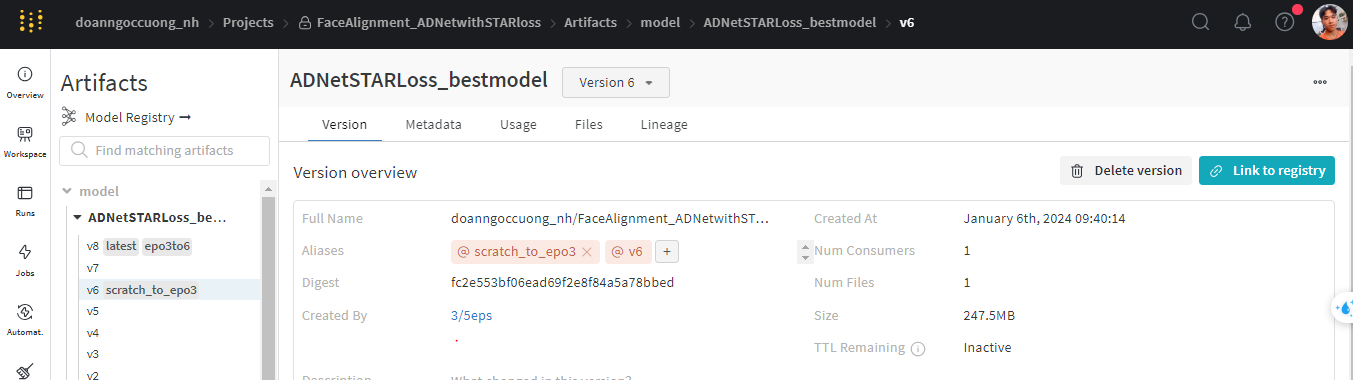

In [ ]:
# Connect wandb
!pip install wandb
import wandb
wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161")    # key's DoanNgocCuong
wandb.init(project = "FaceAlignment_ADNetwithSTARloss", entity="doanngoccuong_nh")
# entity: người/nhóm thực hiện

[Errno 2] No such file or directory: '/content/drive/MyDrive/colab/star'
/content/drive/MyDrive/colab


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin


In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss/ADNetSTARLoss_bestmodel:v6', type='model')
artifact_dir = artifact.download()

wandb: Downloading large artifact ADNetSTARLoss_bestmodel:v6, 236.07MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:11.7


In [ ]:
%cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
!python main.py --mode=train --device_ids=0 \
                --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                --data_definition=WFLW \
                --batch_size=4 --val_batch_size=4 \
                --pretrained_weight='/content/drive/MyDrive/colab/artifacts/ADNetSTARLoss_bestmodel:v6/best_model_epoch3_valbest_metric0.0795.pkl'
'''
INFO
2024-01-06 05:53:00,937 INFO    : Loaded data
2024-01-06 05:53:00,938 INFO    : Optimizer type adam. Start training...
2024-01-06 05:53:00,938 INFO    : Train/Epoch: 0/6, Learning rate decays to [0.001], [Time Left: 00:00:00]eval_time: 0.00, 
2024-01-06 05:53:00,939 INFO    : Train/Epoch: 1/6, Learning rate decays to [0.001], [Time Left: 00:00:00]eval_time: 0.00, 
2024-01-06 05:53:00,940 INFO    : Train/Epoch: 2/6, Learning rate decays to [0.001], [Time Left: 00:00:00]eval_time: 0.00, 
2024-01-06 05:53:00,961 INFO    : Forward process, Dataset size: 2499, Batch size: 4
'''

/content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss/wandb/run-20240106_055257-bobsgmuc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run visionary-snowball-70
wandb: ⭐️ View project at https://wandb.ai/doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss
wandb: 🚀 View run at https://wandb.ai/doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss/runs/bobsgmuc
mode is train, config_name is alignment, pretrained_weight is /co

nếu set max_e = 3 thì nó chạy 1/3, 2/3, 3/3 xong siêu nhanh vì nó chỉ load lại

To add the `--pretrained_weights` argument to your code and avoid the "unrecognized arguments" error, you need to make the following modifications:

1. Update `trainer.py` to accept the `--pretrained_weights` argument:

   In the `trainer.py` script, you should modify the argument parser to include the `--pretrained_weights` argument. Add the following lines to the `add_base_options` function in `trainer.py`:

   ```python
   group.add_argument("--pretrained_weights", type=str, default=None, help="path to pretrained weights")
   ```

   This will allow you to pass the `--pretrained_weights` argument when running the script.

2. Modify the model loading logic in `train_worker`:

   Inside the `train_worker` function in `trainer.py`, you need to modify the logic for loading the pretrained model. Update the following lines:

   ```python
   if args.pretrained_weight is not None:
       if not os.path.exists(args.pretrained_weight):
           pretrained_weight = os.path.join(config.work_dir, args.pretrained_weight)
       else:
           pretrained_weight = args.pretrained_weight
       # Load the pretrained weights using the argument provided
       try:
           checkpoint = torch.load(pretrained_weight)
           net.load_state_dict(checkpoint["net"], strict=False)
           if net_ema is not None:
               net_ema.load_state_dict(checkpoint["net_ema"], strict=False)
           if config.logger is not None:
               config.logger.warn("Successed to load pretrain model %s." % pretrained_weight)
           start_epoch = checkpoint["epoch"]
           optimizer.load_state_dict(checkpoint["optimizer"])
           scheduler.load_state_dict(checkpoint["scheduler"])
       except:
           start_epoch = 0
           if config.logger is not None:
               config.logger.warn("Failed to load pretrain model %s." % pretrained_weight)
   else:
       start_epoch = 0
   ```

   This modification allows you to load pretrained weights when the `--pretrained_weights` argument is provided during training.

3. Modify the command line in your training script:

   When running your training script (`main.py`), make sure to use the `--pretrained_weights` argument instead of `--pretrained_weight` (note the plural "weights"). Here's an example:

   ```bash
   %cd /content/drive/MyDrive/colab/FaceAlignment_WFLWds_ADNetwithSTARloss
   !python main.py --mode=train --device_ids=0 \
                   --image_dir='/content/drive/MyDrive/colab/dataset_for_STAR/image_dir' \
                   --annot_dir='/content/drive/MyDrive/colab/dataset_for_STAR/annot_dir' \
                   --data_definition=WFLW \
                   --batch_size=4 --val_batch_size=4 \
                   --pretrained_weights='/content/artifacts/ADNetSTARLoss_bestmodel:v0/best_model.pkl'
   ```

   Ensure that you pass `--pretrained_weights` instead of `--pretrained_weight` in your command.

With these modifications, your code should now accept the `--pretrained_weights` argument during training and load the pretrained weights accordingly.

```python
# File main.py
    # Bug: Viết thừa 1 chữ s
    # group.add_argument("--pretrained_weights", type=str, default=None, help="path to pretrained weights")
    group.add_argument("--pretrained_weight", type=str, default=None, help="path to pretrained weights")
```
=> Sau đó gộp chung với đối số (argument)-argparse của  tester.py

Trong đoạn mã bạn cung cấp, `best_metric` được sử dụng để xác định và lưu trữ mô hình tốt nhất sau mỗi lần lặp (epoch) trong quá trình huấn luyện. Tuy nhiên, mã không cung cấp thông tin cụ thể về loại metric được sử dụng để đánh giá mô hình. Để xác định loại metric này, bạn cần xem xét cách mà `metrics` được tính toán và cập nhật trong quá trình huấn luyện.

Từ đoạn mã, chúng ta có thể thấy rằng `metrics` được thu thập và đánh giá trong phần validation của quá trình huấn luyện:

```python
result, metrics = utility.forward(config, val_loader, epoch_net)
```

Sau đó, `best_metric` được cập nhật dựa trên một chỉ số cụ thể trong `metrics`:

```python
cur_metric = metrics[config.key_metric_index][0]
if best_metric is None or best_metric > cur_metric:
    best_metric = cur_metric
    # ... lưu mô hình, cập nhật đường dẫn, log thông tin, v.v...
```

Ở đây, `config.key_metric_index` là chỉ số của metric quan trọng nhất mà bạn sử dụng để đánh giá mô hình. Giá trị này phụ thuộc vào cách bạn cấu hình và các tiêu chí bạn chọn để đánh giá mô hình trong bài toán cụ thể của bạn. Ví dụ, trong các bài toán liên quan đến học sâu, các metric phổ biến bao gồm độ chính xác (accuracy), hàm mất mát (loss), độ chính xác trên từng lớp (class-wise accuracy), mean squared error (MSE), v.v.

Trong trường hợp này, có vẻ như bạn đang sử dụng một loại metric gồm ba giá trị (`[NME, FR, AUC]`), nhưng chỉ số cụ thể được sử dụng để cập nhật `best_metric` là `metrics[config.key_metric_index][0]`. Điều này có nghĩa là bạn chỉ lấy giá trị đầu tiên từ bộ ba này (có lẽ là NME - Normalized Mean Error). Tuy nhiên, để chắc chắn, bạn cần kiểm tra cài đặt của `config.key_metric_index` và cách `metrics` được tính toán trong hàm `utility.forward`.

- đồ thị màu tím là model train từ epoch 1, đồ thị đỏ là train từ epoch số 2.
Tôi muốn điều chỉnh code để không chỉ epoch được cập nhật khi sử dụng pretrained_weights mà cả iter cũng được sử dụng (mục đích để đồ thị được liền mạch).
(kiểu iter bị tính lại từ đầu => 1 đồ thị thì chạy bên trên, 1 cái chạy tà tà bên dưới vì nó train tử epoch 2).
- Muốn log lại inter trong quá trình train thì vào file utility.py (tương tự như log 'Average STARLoss_v2 Train(sum/len)' vào wandb sửa file utility.py). Sửa thêm các file main.py và trainer.py để log lại iter và training tiếp từ iter.

## 2.4 INFER - PREDECTION - SMALL REAL TESTING

In [ ]:
# %cd /content/drive/MyDrive/colab
!git clone https://github.com/DoanNgocCuongBKEGNH/FaceAlignment_WFLWds_ADNetwithSTARloss.git --branch WFLWds_ADNetwithSTARLoss
!pip install -r requirements.txt

In [ ]:
%cd /content
!git clone https://github.com/zhenglinzhou/star

/content
Cloning into 'star'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 72 (delta 8), reused 69 (delta 5), pack-reused 0
Receiving objects: 100% (72/72), 990.84 KiB | 7.86 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
%cd /content
import wandb
wandb.login(key="c8767797aae76cbcd389ff29929ace1ac3021161")
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceAlignment_ADNetwithSTARloss/ADNetSTARLoss_bestmodel:v0', type='model')
artifact_dir = artifact.download()

# https://drive.usercontent.google.com/download?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT&export=download&authuser=0
# https://drive.usercontent.google.com/download?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT
# %cd /content/drive/MyDrive/colab
%cd /content
import gdown
gdown.download('https://drive.google.com/u/0/uc?id=1aOx0wYEZUfBndYy_8IYszLPG_D2fhxrT', 'WFLW_STARLoss_NME_4_02_FR_2_32_AUC_0_605.pkl')


In [ ]:
# %cd /content/drive/MyDrive/colab
!git clone https://github.com/italojs/facial-landmarks-recognition

- Thêm đường dẫn landmark vào file demo.py
- Thêm đường dẫn best model vào file demo.py
-

In [ ]:
!pip install gradio

In [ ]:
%cd /content/FaceAlignment_WFLWds_ADNetwithSTARloss
!python demo.py



- output ra 1 đống DEBUG và Figure(640x480) chỉ thấy như này, ko thấy ảnh ra gì cả, dù trong code có plt.show().
Nguyên nhân có thể là do ảnh kích thước to quá.

- Test ko nên chọn ảnh bị che 1 phần mặt


## 2.5 INFER - EVALUATION on BIG TESTSET

# 3.